# Lab 4 Linear Regression

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split

In [2]:
dataBase = pd.read_csv('train.csv')

## QUESTION 1

### 1a: Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

#### SalePrice and GrLivArea

In [3]:
saleGr = pd.DataFrame(dataBase[['SalePrice', 'GrLivArea']])
salesPrice = pd.DataFrame(dataBase['SalePrice'])
grLivArea = pd.DataFrame(dataBase['GrLivArea'])

####  GrLivArea [Predictor] / SalePrice [Response]
##### Train and Test (80:20) 
##### [Total Data is = 1460]
###### Test  =  292
###### Train = 1168

In [4]:
# salepricetrain = pd.DataFrame(salesPrice[:1168])
# grlivareatrain = pd.DataFrame(grLivArea[:1168])
# salepricetest = pd.DataFrame(salesPrice[-292:])
# grlivareatest = pd.DataFrame(grLivArea[-292:])

salepricetrain, salepricetest, grlivareatrain, grlivareatest = train_test_split(salesPrice, grLivArea, test_size = 0.20)

In [5]:
salepricetrain.describe()

,SalePrice
count,1168.000000
mean,180537.803938
std,78149.347369
min,34900.000000
25%,130000.000000
50%,160100.000000
75%,213625.000000
max,745000.000000


In [6]:
salepricetest.describe()

,SalePrice
count,292.000000
mean,182454.763699
std,84540.600056
min,35311.000000
25%,129800.000000
50%,167700.000000
75%,214250.000000
max,755000.000000


In [7]:
grlivareatrain.describe()

,GrLivArea
count,1168.000000
mean,1518.172945
std,528.902049
min,334.000000
25%,1126.000000
50%,1461.500000
75%,1790.500000
max,5642.000000


In [8]:
grlivareatest.describe()

,GrLivArea
count,292.000000
mean,1504.626712
std,512.311487
min,480.000000
25%,1161.750000
50%,1465.000000
75%,1718.000000
max,4316.000000


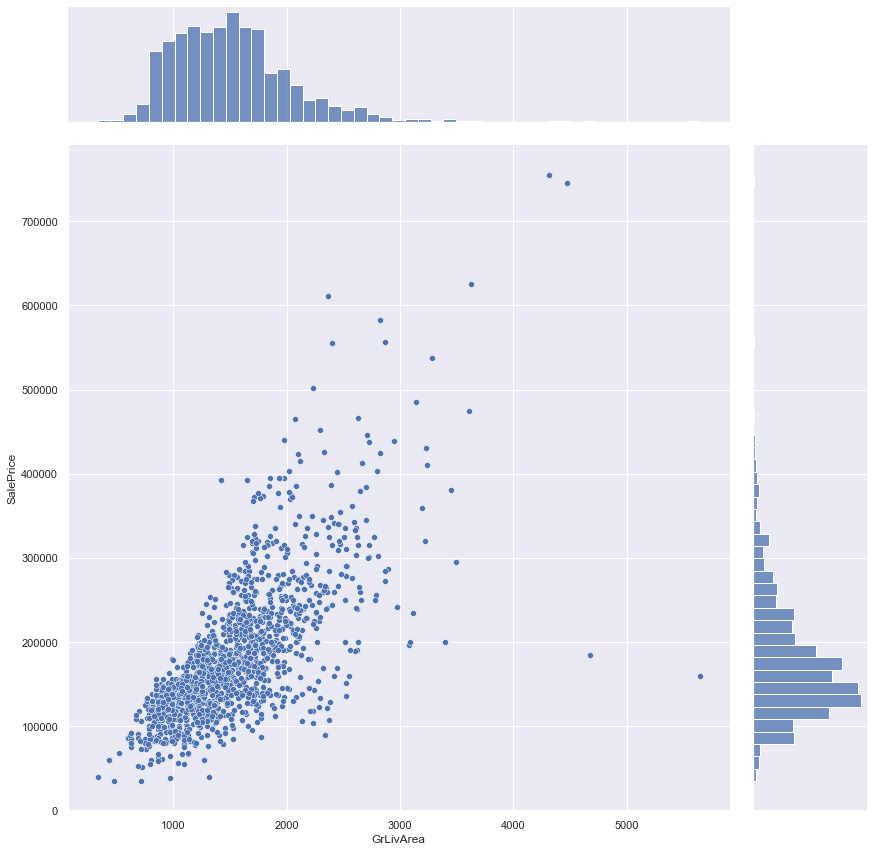

In [9]:
trainDF = pd.concat([salepricetrain, grlivareatrain], axis = 1).reindex(salepricetrain.index)
sb.jointplot(data = dataBase, x = "GrLivArea", y = "SalePrice", height = 12)

In [10]:
linreg = LinearRegression()
linreg.fit(grlivareatrain, salepricetrain)

LinearRegression()

Intercept 	: b =  [25935.25795266]
Coefficients 	: a =  [[101.8346075]]


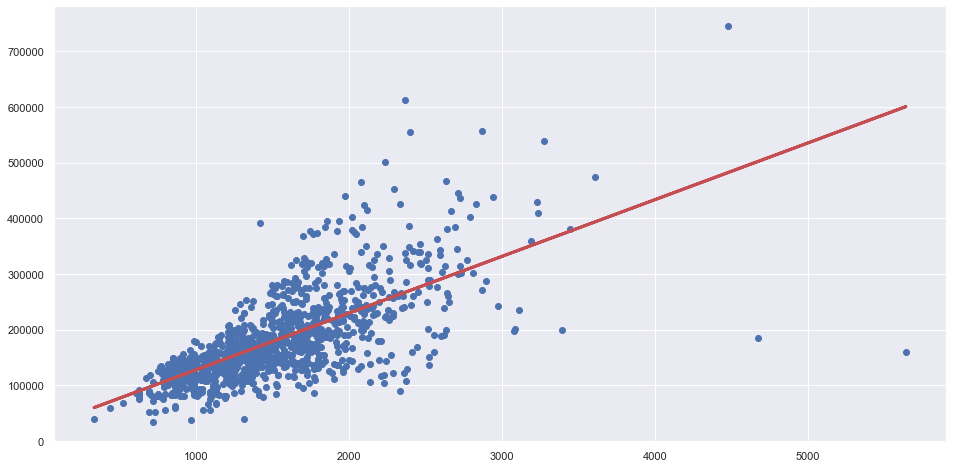

In [11]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = grlivareatrain
regline_y = linreg.intercept_ + linreg.coef_ * grlivareatrain
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareatrain, salepricetrain)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

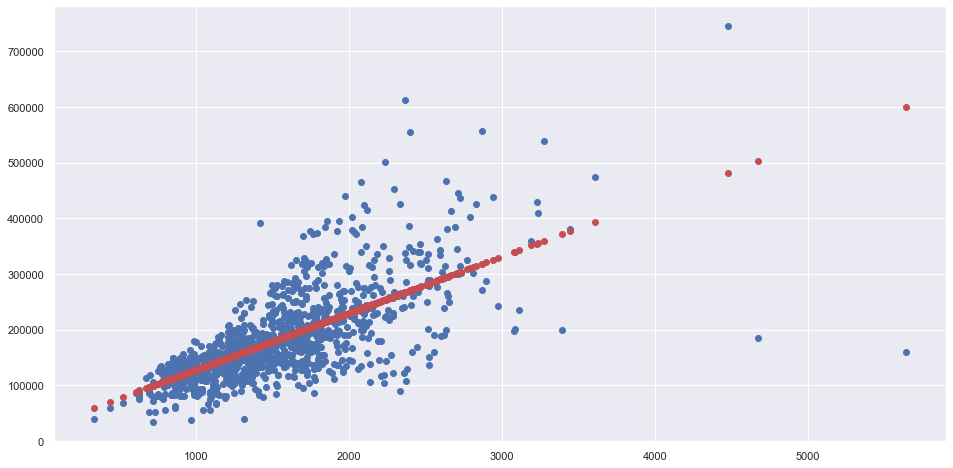

In [12]:
salepricetrain_pred = linreg.predict(grlivareatrain)
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareatrain, salepricetrain)
plt.scatter(grlivareatrain, salepricetrain_pred, color = "r")
plt.show()

### 1b: Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [13]:
print("Explained Variance (R^2) \t:", linreg.score(grlivareatrain, salepricetrain))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetrain, salepricetrain_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.47499668098281345
Mean Squared Error (MSE) 	: 3203618355.5137577
Root Mean Squared Error (RMSE) 	: 56600.515505724485


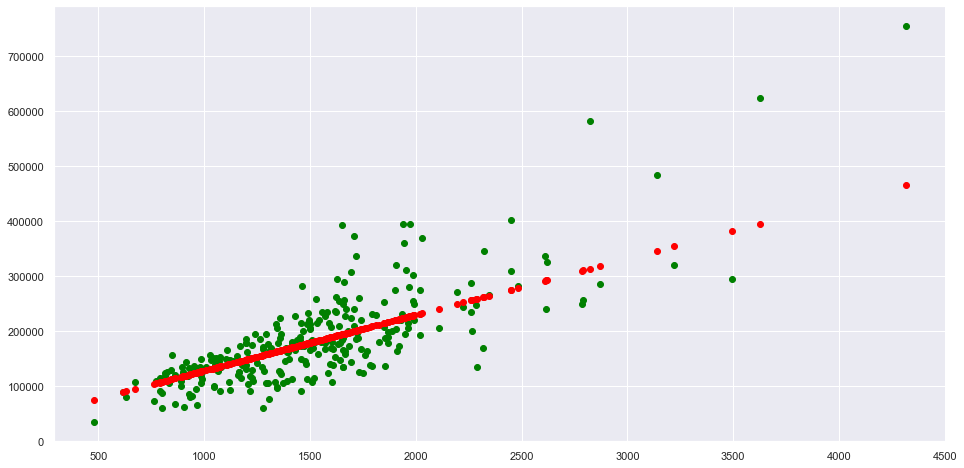

In [14]:
salepricetest_pred = linreg.predict(grlivareatest)
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareatest, salepricetest, color = "green")
plt.scatter(grlivareatest, salepricetest_pred, color = "red")
plt.show()

#### Goodness of Fit of Model for Test Set
Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [15]:
testgrlivarea = linreg.score(grlivareatest, salepricetest)
print("Explained Variance (R^2) \t:", testgrlivarea)

def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
GrLiVAreaMse = mean_sq_err(salepricetest, salepricetest_pred)

print("Mean Squared Error (MSE) \t:", GrLiVAreaMse)

Explained Variance (R^2) 	: 0.5892518734039845
Mean Squared Error (MSE) 	: 2925609657.627387


## QUESTION 2

### 2: Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

In [16]:
# tbsmt = TotalBsmtSF
# tbsmttrain = TotalBsmtSF Train
# tbsmttest = TotalBsmtSF Test

# garea = GarageArea
# gareatrain = GarageArea Train
# gareatest = GarageArea Test
tbsmt = pd.DataFrame(dataBase['TotalBsmtSF'])
garea = pd.DataFrame(dataBase['GarageArea'])
saletbsmtgarea = pd.DataFrame(dataBase[['SalePrice', 'TotalBsmtSF', 'GarageArea']])

In [17]:
tbsmttrain, tbsmttest, gareatrain, gareatest = train_test_split(tbsmt, garea, test_size = 0.20)

#### Basement Area

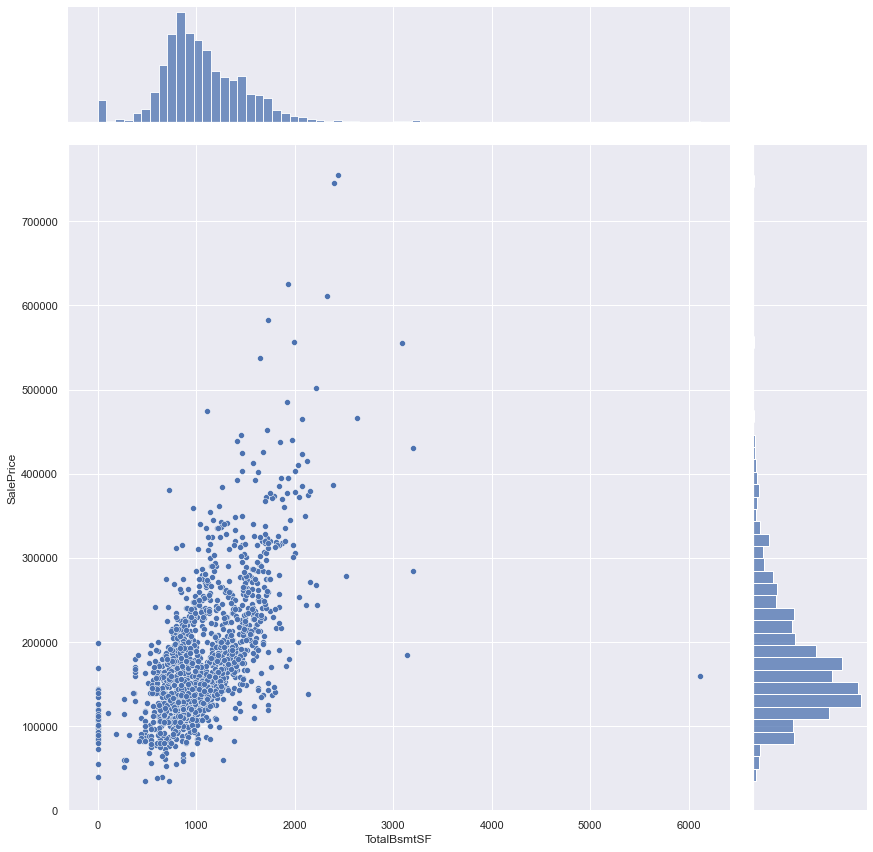

In [18]:
trainDF = pd.concat([salepricetrain, tbsmttrain], axis = 1).reindex(salepricetrain.index)
sb.jointplot(data = dataBase, x = "TotalBsmtSF", y = "SalePrice", height = 12)

In [19]:
linreg.fit(tbsmttrain, salepricetrain)

LinearRegression()

#### tbsmttrain

Intercept 	: b =  [185874.49253744]
Coefficients 	: a =  [[-5.06810507]]


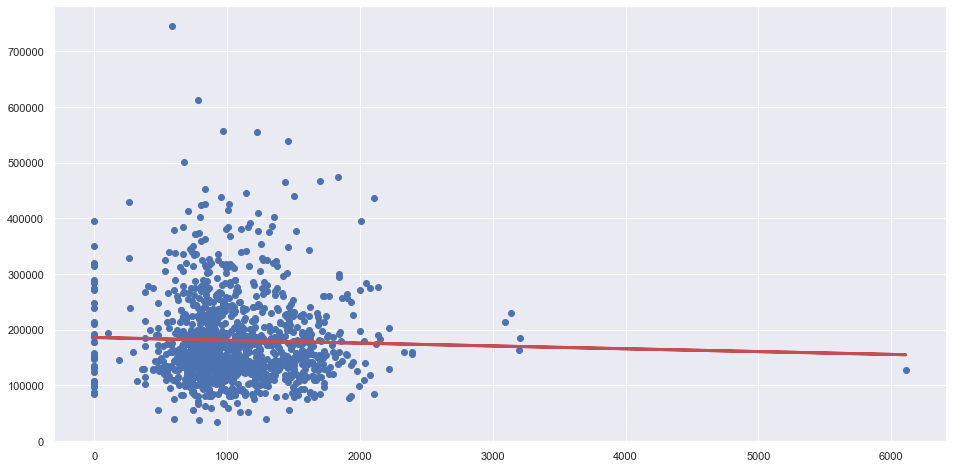

In [20]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = tbsmttrain
regline_y = linreg.coef_ * tbsmttrain + linreg.intercept_  
f = plt.figure(figsize=(16, 8))
plt.scatter(tbsmttrain, salepricetrain)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [21]:
print("Explained Variance (R^2) \t:", linreg.score(tbsmttrain, salepricetrain))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetrain, salepricetrain_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.0008501777087969176
Mean Squared Error (MSE) 	: 3203618355.5137577


#### tbsmtest

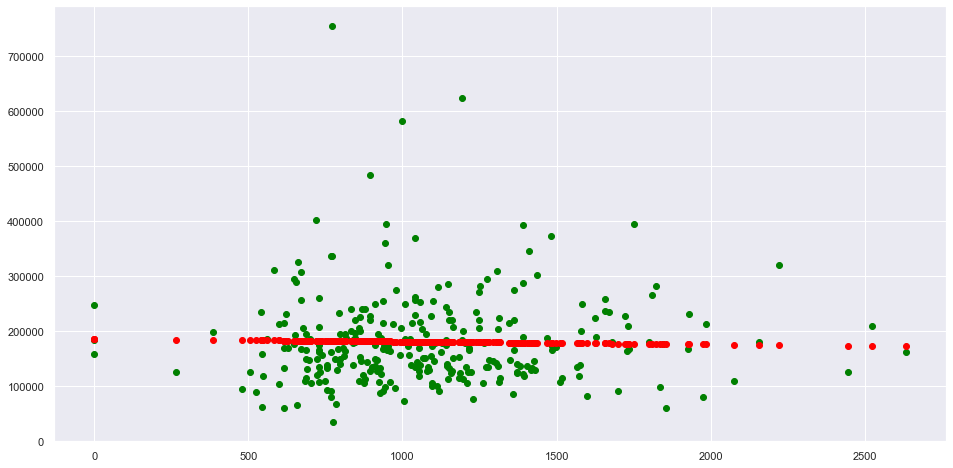

In [22]:
salepricetest_pred = linreg.predict(tbsmttest)
f = plt.figure(figsize=(16, 8))
plt.scatter(tbsmttest, salepricetest, color = "green")
plt.scatter(tbsmttest, salepricetest_pred, color = "red")
plt.show()

In [23]:
print("Explained Variance (R^2) \t:", linreg.score(tbsmttest, salepricetest))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetest, salepricetest_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: -0.0023430282506256006
Mean Squared Error (MSE) 	: 7139325182.095568


#### Garage Area

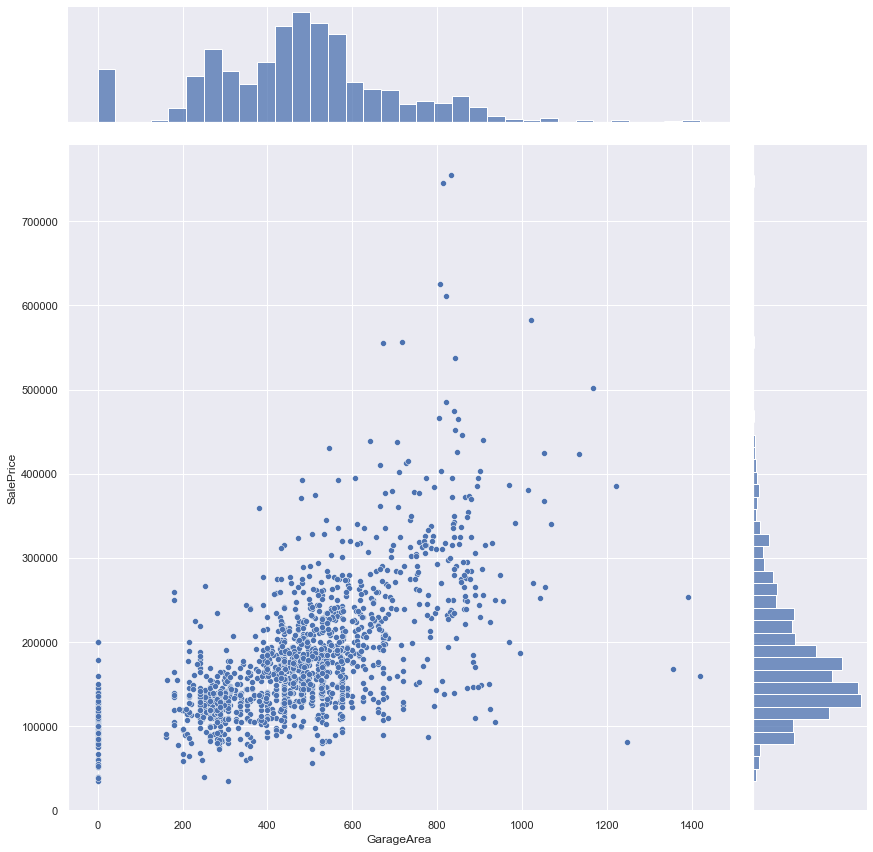

In [24]:
trainDF = pd.concat([salepricetrain, gareatrain], axis = 1).reindex(salepricetrain.index)
sb.jointplot(data = dataBase, x = "GarageArea", y = "SalePrice", height = 12)

In [25]:
linreg.fit(gareatrain, salepricetrain)

LinearRegression()

#### gareatrain 

Intercept 	: b =  [187715.2229986]
Coefficients 	: a =  [[-15.22835647]]


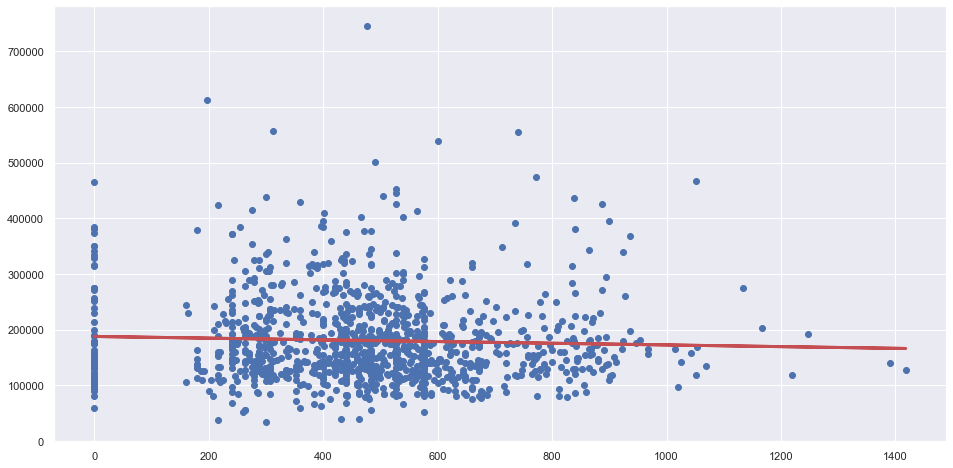

In [26]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = gareatrain
regline_y = linreg.coef_ * gareatrain + linreg.intercept_ 
f = plt.figure(figsize=(16, 8))
plt.scatter(gareatrain, salepricetrain)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [27]:
print("Explained Variance (R^2) \t:", linreg.score(gareatrain, salepricetrain))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetrain, salepricetrain_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.0017758126769905624
Mean Squared Error (MSE) 	: 3203618355.5137577


#### gareatest

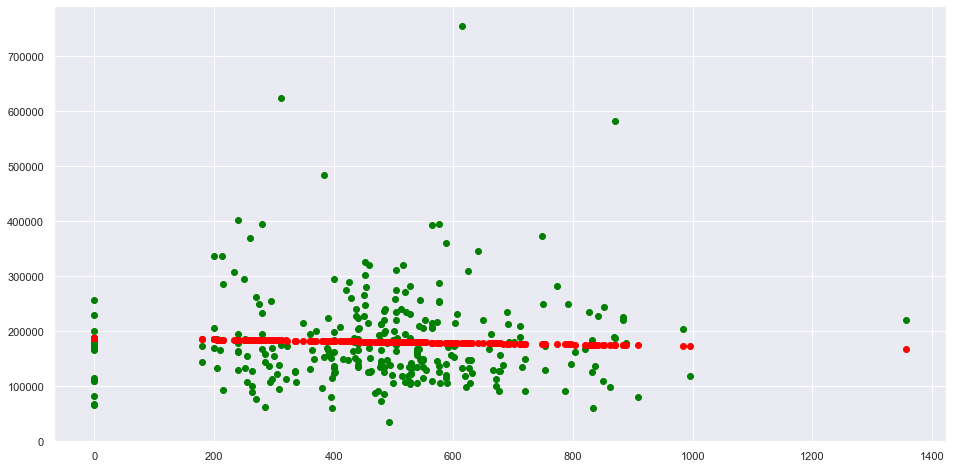

In [28]:
salepricetest_pred = linreg.predict(gareatest)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(gareatest, salepricetest, color = "green")
plt.scatter(gareatest, salepricetest_pred, color = "red")
plt.show()

In [29]:
print("Explained Variance (R^2) \t:", linreg.score(gareatest, salepricetest))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetest, salepricetest_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: -0.004889000575448277
Mean Squared Error (MSE) 	: 7157459217.8689785


In [30]:
print("GrLivArea")
print("Explained Variance (R^2) \t:", testgrlivarea )
print("Mean Squared Error (MSE) \t:", GrLiVAreaMse)
print("\n")
print("TotalBsmtSF")
print("Explained Variance (R^2) \t: -0.0004950891788646494")
print("Mean Squared Error (MSE) \t: 6708689277.558462")
print("\n")
print("GarageArea")
print("Explained Variance (R^2) \t: -7.44885693277908e-05")
print("Mean Squared Error (MSE) \t: 6705868995.05048")

GrLivArea
Explained Variance (R^2) 	: 0.5892518734039845
Mean Squared Error (MSE) 	: 2925609657.627387


TotalBsmtSF
Explained Variance (R^2) 	: -0.0004950891788646494
Mean Squared Error (MSE) 	: 6708689277.558462


GarageArea
Explained Variance (R^2) 	: -7.44885693277908e-05
Mean Squared Error (MSE) 	: 6705868995.05048


#### As seen in the values compared aboce, GrLivArea is the best option due to it's lowest "Mean Squared Error" (MSE) and highest "Explained Variance" 

## QUESTION 3

### 3a: Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean. `

In [31]:
from matplotlib.cbook import boxplot_stats  

Outlier for SalePrice:  61


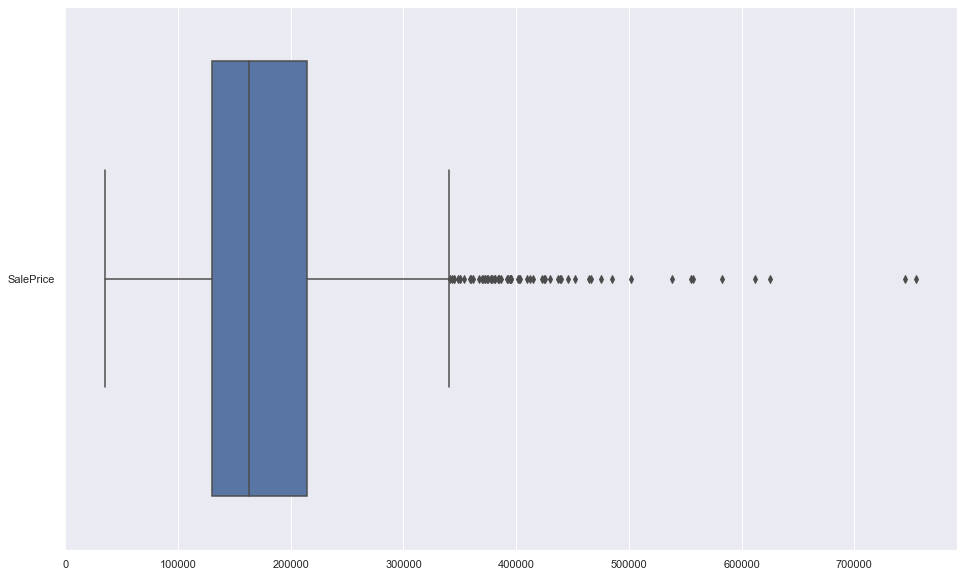

In [32]:
f = f = plt.figure(figsize=(16,10))
sb.boxplot(data = salesPrice, orient = "h")
outlier = len(boxplot_stats(dataBase.SalePrice).pop(0)['fliers'])
print('Outlier for SalePrice: ', outlier)

Outlier for LotArea:  31


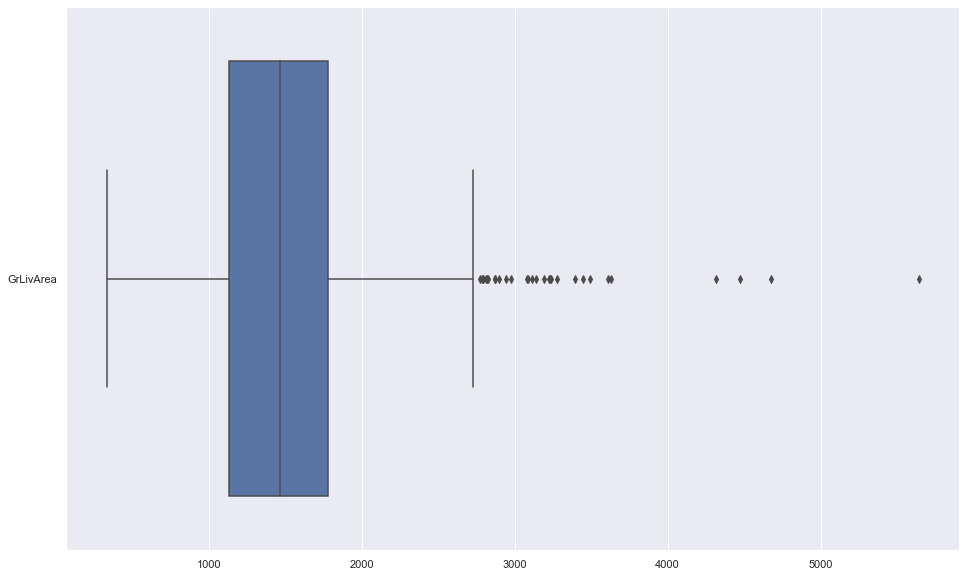

In [33]:
f = f = plt.figure(figsize=(16,10))
sb.boxplot(data = grLivArea, orient = "h")
outlier = len(boxplot_stats(dataBase.GrLivArea).pop(0)['fliers'])
print('Outlier for LotArea: ', outlier)

In [34]:
col = ['SalePrice','GrLivArea']
Q1 = np.percentile(saleGr[col], 25, interpolation = 'midpoint')
Q3 = np.percentile(saleGr[col], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(saleGr[col] > (Q3+1.5*IQR))
lower = np.where(saleGr[col] < (Q1-1.5*IQR))
saleGr.drop(upper[0], inplace = True)
saleGr.drop(lower[0], inplace= True)
saleGr.drop(upper[1], inplace = True)
saleGr.drop(lower[1], inplace= True)

/var/folders/v4/rvgfcwzd6rj1rjvpkf2cnlx40000gn/T/ipykernel_5019/1069251101.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(saleGr[col], 25, interpolation = 'midpoint')
/var/folders/v4/rvgfcwzd6rj1rjvpkf2cnlx40000gn/T/ipykernel_5019/1069251101.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(saleGr[col], 75, interpolation = 'midpoint')


### 3b: In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model onthe Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

In [35]:
salepricenew = pd.DataFrame(saleGr['SalePrice'])
grlivareanew = pd.DataFrame(saleGr['GrLivArea'])

In [36]:
# salepricenewtrain = pd.DataFrame(salepricenew[:1148])
# salepricenewtest = pd.DataFrame(salepricenew[-287:])
# grlivareanewtrain = pd.DataFrame(grlivareanew[:1148])
# grlivareanewtest = pd.DataFrame(grlivareanew[-287:])

salepricenewtrain, salepricenewtest, grlivareanewtrain, grlivareanewtest = train_test_split(salepricenew, grlivareanew, test_size = 0.20)

In [37]:
salepricenewtrain.describe()

,SalePrice
count,1147.000000
mean,174871.226678
std,66091.312296
min,34900.000000
25%,129250.000000
50%,161000.000000
75%,209750.000000
max,402861.000000


In [38]:
linreg.fit(grlivareanewtrain, salepricenewtrain)

LinearRegression()

Intercept 	: b =  [44978.03269419]
Coefficients 	: a =  [[87.47406734]]


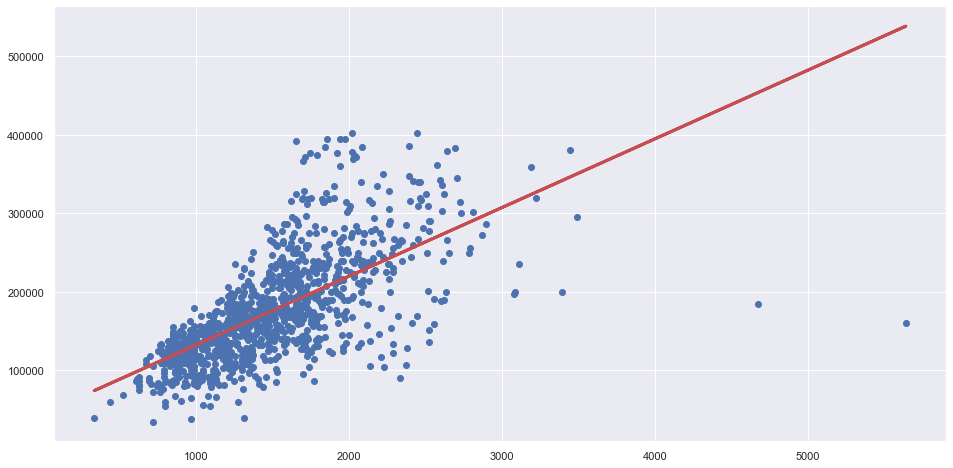

In [39]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = grlivareanewtrain
regline_y = linreg.intercept_ + linreg.coef_ * grlivareanewtrain
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareanewtrain, salepricenewtrain)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

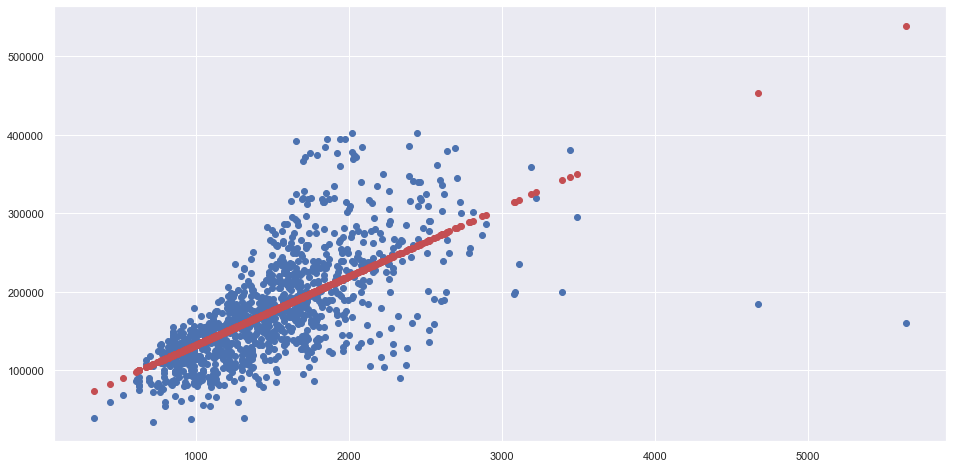

In [40]:
salepricetrain_pred = linreg.predict(grlivareanewtrain)
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareanewtrain, salepricenewtrain)
plt.scatter(grlivareanewtrain, salepricetrain_pred, color = "r")
plt.show()

### 3c: Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

#### grlivareanewtrain

In [41]:
print("Explained Variance (R^2) \t:", linreg.score(grlivareanewtrain, salepricenewtrain))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricenewtrain, salepricetrain_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.43808867002084684
Mean Squared Error (MSE) 	: 2452323382.9064865


#### grlivareanewtest

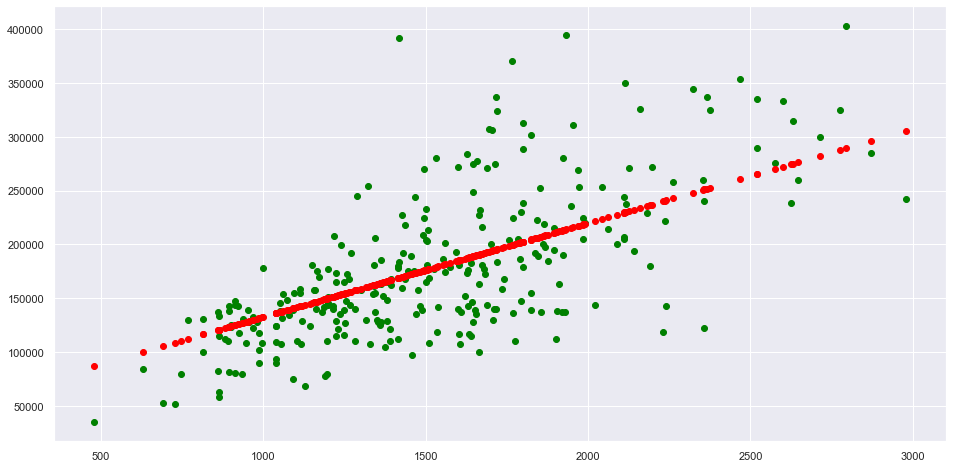

In [42]:
salepricetest_pred = linreg.predict(grlivareanewtest)
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareanewtest, salepricenewtest, color = "green")
plt.scatter(grlivareanewtest, salepricetest_pred, color = "red")
plt.show()

In [43]:
test_GrLiVArea = linreg.score(grlivareanewtest, salepricenewtest)
print("Explained Variance (R^2) \t:", test_GrLiVArea)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

GrLiVAreaMse = mean_sq_err(salepricenewtest, salepricetest_pred)
print("Mean Squared Error (MSE) \t:", GrLiVAreaMse)

Explained Variance (R^2) 	: 0.4620516835241111
Mean Squared Error (MSE) 	: 2560482700.11412


In [44]:
print("<GrLivArea with outliers>")
print("Explained Variance (R^2) \t: 0.3683894557150508")
print("Mean Squared Error (MSE) \t: 4235182093.2124324")
print("\n")
print("<GrLivArea with outliers>")
print("Explained Variance (R^2) \t: 0.22278684052957454")
print("Mean Squared Error (MSE) \t: 3307423721.99837")

<GrLivArea with outliers>
Explained Variance (R^2) 	: 0.3683894557150508
Mean Squared Error (MSE) 	: 4235182093.2124324


<GrLivArea with outliers>
Explained Variance (R^2) 	: 0.22278684052957454
Mean Squared Error (MSE) 	: 3307423721.99837


#### The model with outliers is better since it have a  higher R^2 Explained Variance as compared to the model without the outliers. Even with a lower MSE, the model without outliers still has a lower accuracy as to the model with outliers. Removing the outliers is not helping with the explaining the data. 

#### WRONG CONCLUSION: Lower MSE means lower error, which means higher accuracy.